In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [27]:
#PART 1
crosstab = pd.crosstab(df["category"], df["isBestSeller"])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [28]:
# Calculate the proportion of best-sellers for each category
crosstab['proportion_bestseller'] = crosstab[True] / (crosstab[False] + crosstab[True])

# Sort the categories based on proportion of best-sellers in descending order
crosstab_sorted = crosstab.sort_values(by='proportion_bestseller', ascending=False)
crosstab_sorted

isBestSeller,False,True,proportion_bestseller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [29]:
# Perform the Chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 36684.23786636857
P-value: 0.0
Degrees of freedom: 590
Expected frequencies:
[[2.47193964e+02 8.09882713e-01 1.85076756e-04]
 [4.05371625e+03 1.32812090e+01 3.03506057e-03]
 [2.49203347e+02 8.16466063e-01 1.86581203e-04]
 [1.69145759e+03 5.54173022e+00 1.26641233e-03]
 [2.53182120e+02 8.29501733e-01 1.89560152e-04]
 [8.50215078e+03 2.78556353e+01 6.36565092e-03]
 [1.06659816e+02 3.49450041e-01 7.98573411e-05]
 [2.57176598e+02 8.42588862e-01 1.92550861e-04]
 [9.51783364e+03 3.11833217e+01 7.12610350e-03]
 [1.50008640e+04 4.91473992e+01 1.12313068e-02]
 [9.32544259e+03 3.05529901e+01 6.98205827e-03]
 [2.38244365e+02 7.80561099e-01 1.78376096e-04]
 [3.22941764e+03 1.05805557e+01 2.41789941e-03]
 [9.44704154e+03 3.09513853e+01 7.07310070e-03]
 [6.68808280e+03 2.19121962e+01 5.00743888e-03]
 [5.26284806e+02 1.72426931e+00 3.94035044e-04]
 [1.90296406e+04 6.23468982e+01 1.42476948e-02]
 [2.77192166e+03 9.08165957e+00 2.07536729e-03]
 [2.53178196e+02 8.29488876e-01 1.895

In [30]:
# Compute Cramer's V
n = crosstab.sum().sum()
phi2 = chi2 / n
r, k = crosstab.shape
cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.08663731815334759


In [40]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

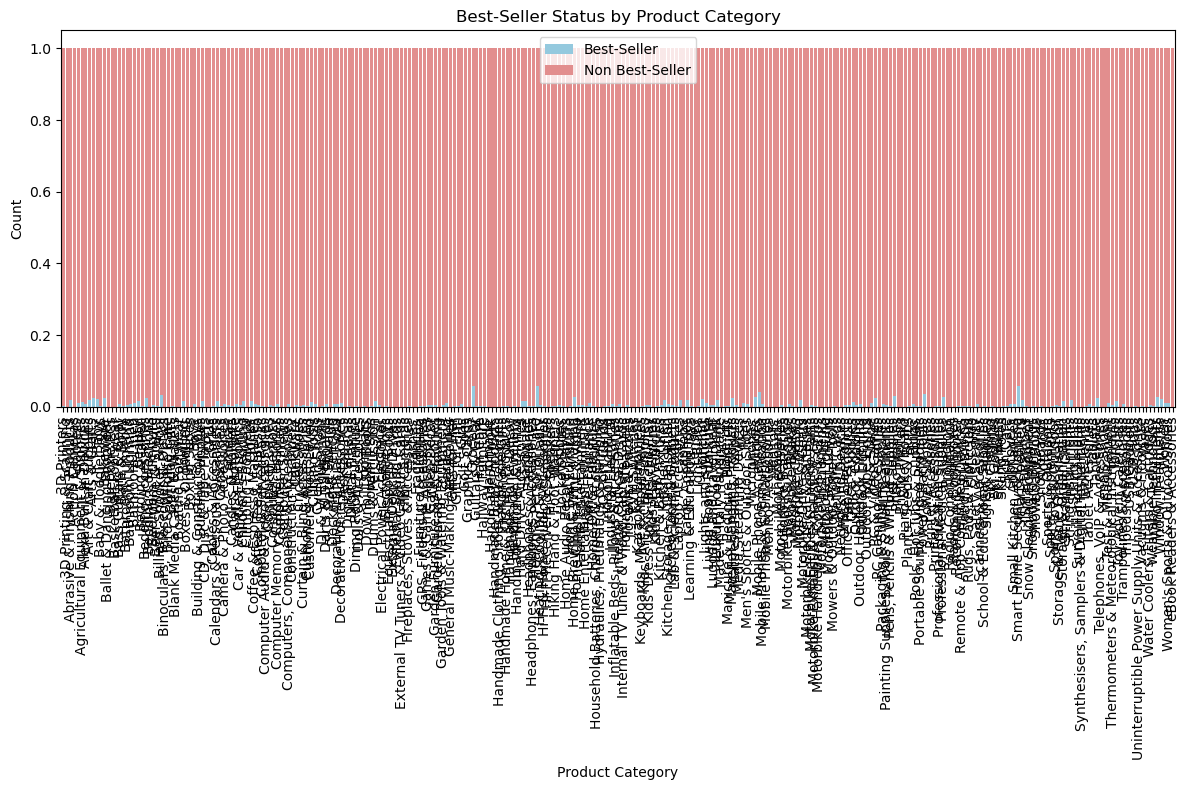

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x=crosstab.index, y=crosstab[True], color='skyblue', label='Best-Seller')
sns.barplot(x=crosstab.index, y=crosstab[False], color='lightcoral', bottom=crosstab[True], label='Non Best-Seller')
plt.title('Best-Seller Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
#PART 2
Q1 = df['price'].quantile(0.25)

Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

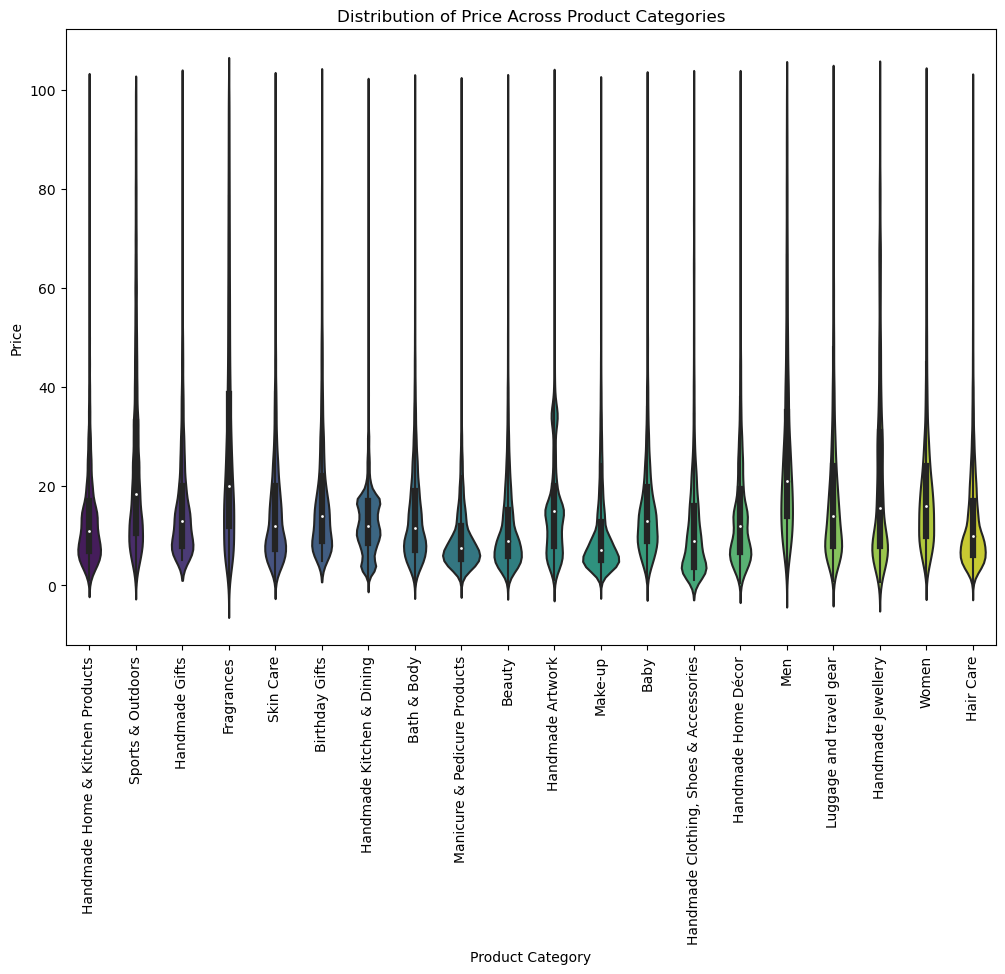

In [46]:
# Filter out the top 20 categories based on count
top_20_categories = df['category'].value_counts().nlargest(20).index
df_filtered = df[df['category'].isin(top_20_categories)]


plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_filtered, palette='viridis')
plt.title('Distribution of Price Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

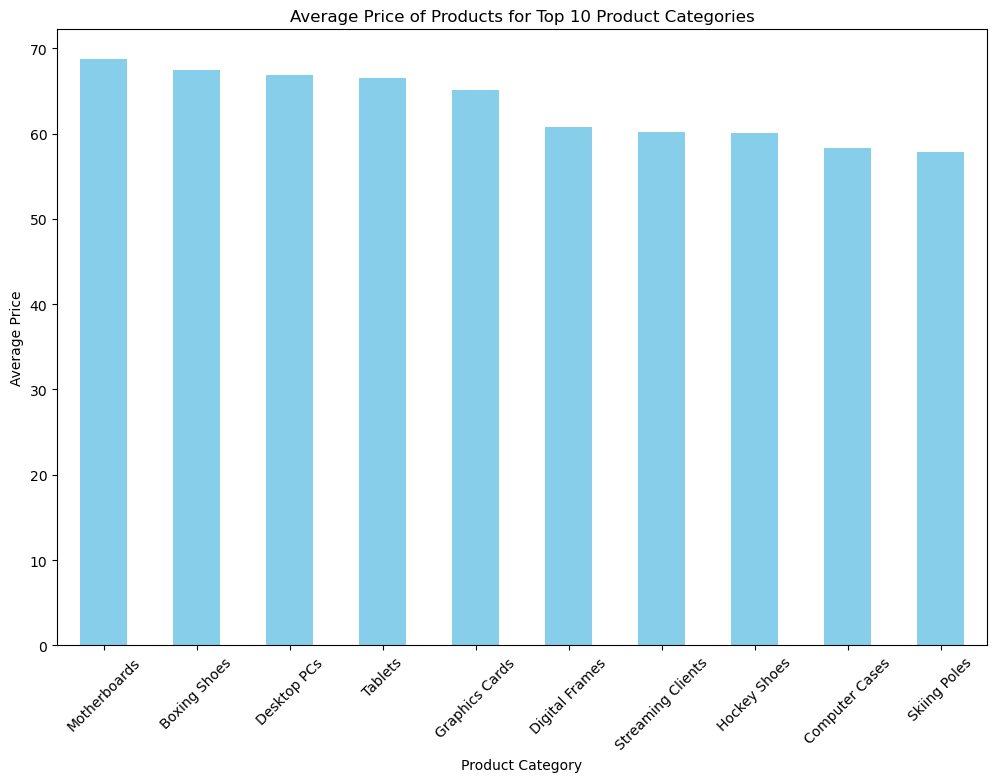

In [48]:
# Calculate the average price for each category
average_prices = df.groupby('category')['price'].mean().nlargest(10)

# Create a bar chart comparing the average price of products for the top 10 product categories
plt.figure(figsize=(12, 8))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


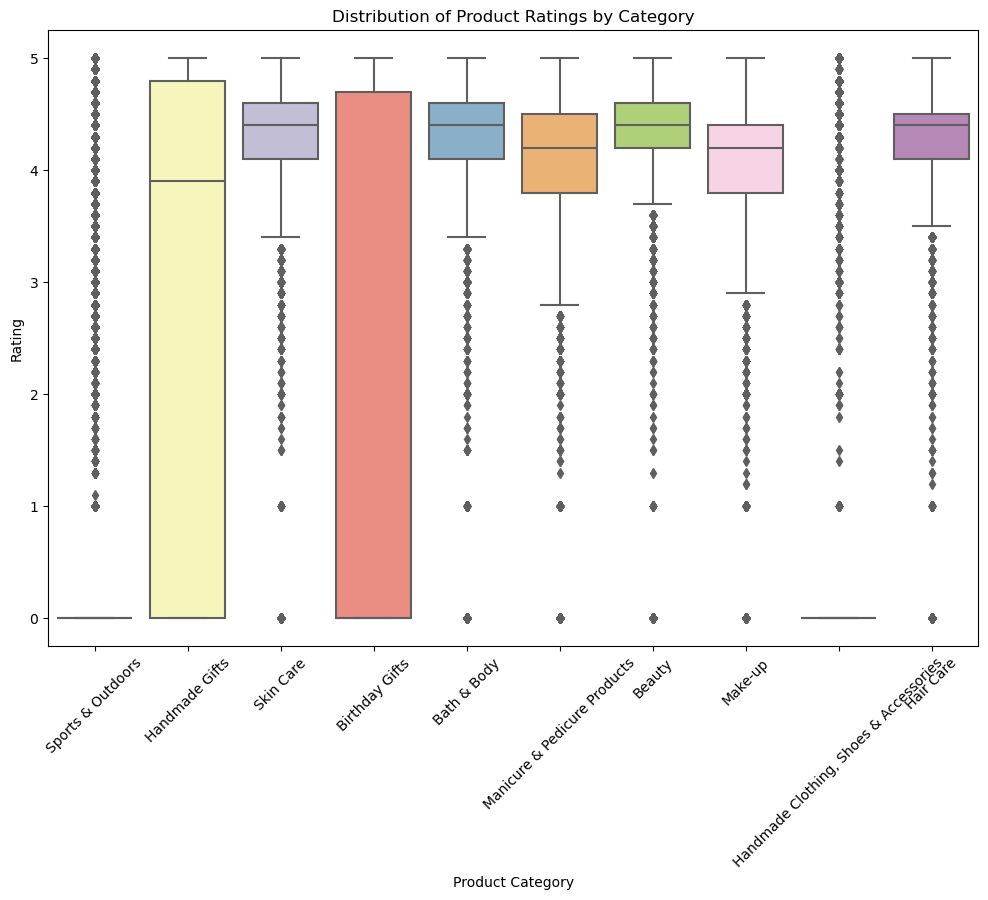

In [50]:
# Filter out the top 10 categories based on count
top_10_categories = df['category'].value_counts().nlargest(10).index
df_filtered_ratings = df[df['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_filtered_ratings, palette='Set3')
plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [52]:
#PART 3

In [54]:
# Calculate the correlation coefficient between price and stars
correlation_coefficient = df['price'].corr(df['stars'])
print(f"The correlation coefficient between price and stars is: {correlation_coefficient}")

The correlation coefficient between price and stars is: -0.0776729987818137


Given the weak correlation coefficient, it suggests that there is not a significant linear relationship between product price and its rating, as the correlation is close to zero.

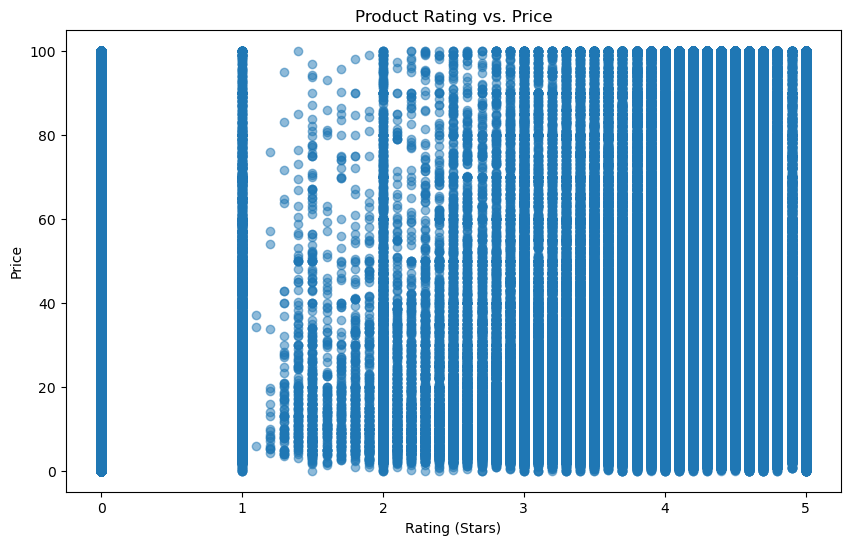

In [57]:
# Create a scatter plot to visualize the relationship between product rating and price
plt.figure(figsize=(10, 6))
plt.scatter(df['stars'], df['price'], alpha=0.5)
plt.title('Product Rating vs. Price')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price')
plt.show()

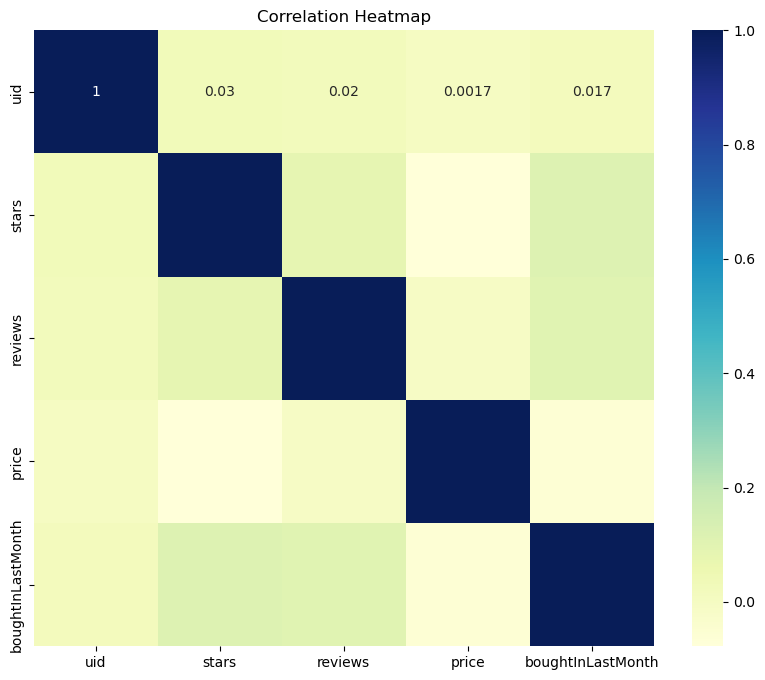

In [71]:
# Select only the numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

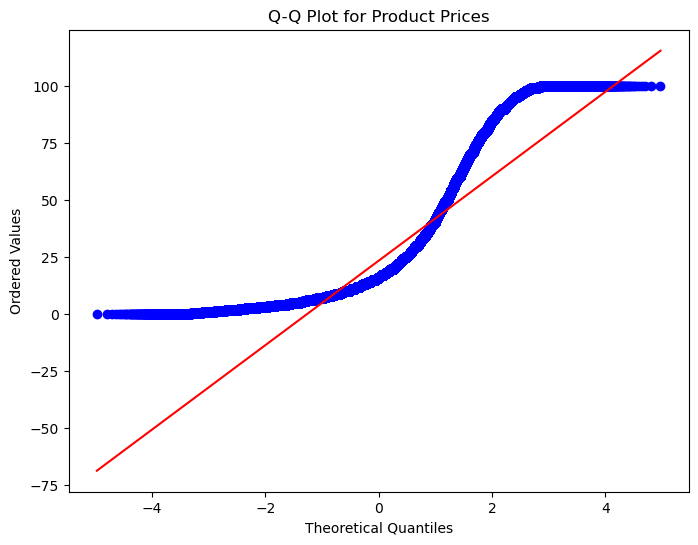

In [75]:
# Generate a Q-Q plot for product prices
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()